<a href="https://colab.research.google.com/github/DCI-alxogm/ml2023-JuanLeonelSantamariaMena/blob/main/ProyectoFinal/Proyecto_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Proyecto Final

---


#Machine Learning

#### Juan Leonel Santamaria Mena

---
## Identificación de Lenguaje de Señas usando Redes Neuronales



---


#abstrad
 En este reporte se presenta el Proyecto Final correspondiente al curso de machine learning del Ago-Dic 2023, este notebook se presentaran las herramientas adquiridas en el presnte curso con la finalidad de desarrollar una red neuronal capas de diferenciar las diferentes letra del lenguaje de señas.

#Justificación

La creación de una red neuronal para distinguir el lenguaje de señas es un paso significativo hacia la inclusión y accesibilidad para las personas con discapacidades auditivas. El lenguaje de señas es una forma crucial de comunicación para la comunidad sorda, pero a menudo se enfrenta a barreras cuando se interactúa con personas que no comprenden este sistema. Implementar una red neuronal para reconocer y comprender el lenguaje de señas puede tener un impacto positivo en la vida diaria de las personas sordas, permitiéndoles una comunicación más fluida y efectiva con aquellos que no conocen este idioma visual.

La tecnología de reconocimiento de lenguaje de señas basada en redes neuronales puede superar las limitaciones de la comunicación tradicional, proporcionando una herramienta que traduce de manera precisa los gestos y movimientos específicos del lenguaje de señas a un formato comprensible para aquellos que no lo conocen. Esto no solo facilita la comunicación interactiva, sino que también promueve la inclusión social y profesional de las personas con discapacidad auditiva al eliminar las barreras lingüísticas.

Además, el desarrollo de una red neuronal para distinguir el lenguaje de señas puede tener aplicaciones más amplias, como la mejora de la tecnología de asistentes virtuales o la creación de sistemas de traducción en tiempo real para entornos donde la comunicación inclusiva es esencial. En última instancia, el uso de la inteligencia artificial para reconocer el lenguaje de señas representa un avance significativo hacia la construcción de un mundo más accesible e inclusivo para todos.

Marco Teorico

* Alto Sesgo (High Bias):
  * Características:
    * El modelo es demasiado simple y no puede capturar la complejidad de los datos de entrenamiento.
    * Tiende a hacer suposiciones fuertes y simplificadoras sobre la relación entre las variables.
  * Impacto:
    * El modelo tendrá un rendimiento deficiente tanto en los datos de entrenamiento como en los datos de prueba.
    * Subestima la verdadera relación subyacente en los datos.

  
* Baja Varianza (Low Variance):
  * Características:
    * El modelo es robusto y no es muy sensible a pequeñas variaciones en los datos de entrenamiento.
    * Generaliza bien a nuevos datos.
  * Impacto:
    * El rendimiento en los datos de entrenamiento y prueba es consistente.
    * Aunque puede tener un buen rendimiento en datos bien conocidos, puede no capturar patrones más complejos.

* Bajo Sesgo (Low Bias):
  * Características:
    * El modelo es más complejo y puede capturar patrones más sutiles en los datos.
    * No hace suposiciones fuertes y simplificadoras.
  * Impacto:
    * Puede tener un buen rendimiento en los datos de entrenamiento y capturar patrones complejos.
    * Sin embargo, puede ser sensible a ruido y variaciones en los datos, lo que puede llevar a un rendimiento deficiente en datos no vistos.
* Alta Varianza (High Variance):
  * Características:
    * El modelo es muy sensible a las fluctuaciones en los datos de entrenamiento.
    * Puede ajustarse demasiado a los datos específicos de entrenamiento.
  * Impacto:
    * Puede tener un rendimiento excelente en los datos de entrenamiento, pero puede generalizar mal a nuevos datos.
    * Es propenso a sobreajuste (overfitting).


Trade-off:
Existe un trade-off entre sesgo y varianza. En general, se busca un equilibrio que minimice el error total del modelo. Un modelo con sesgo y varianza moderados suele ser preferible para lograr una buena generalización a nuevos datos. Este equilibrio se conoce como el "punto óptimo" en el dilema sesgo-varianza. En la práctica, encontrar este punto óptimo puede requerir ajustes en la complejidad del modelo y la cantidad de datos de entrenamiento.

# Visualizacion de Imagenes

## Librerias

In [67]:
# librerias
import sys
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.python.keras import optimizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Flatten,Activation,Convolution2D,MaxPooling2D,BatchNormalization,MaxPool2D

import numpy as np
import matplotlib.pyplot as plt
from PIL import Image, ImageOps
from scipy import ndimage
import pandas as pd

import glob
%matplotlib inline
#acceso a drive
from google.colab import drive
drive.mount('/content/drive')

#numero de pixceles
num_px=28

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Conjuntos

In [71]:
#Conjunto de entrenamiento
train_name = np.array([])
train_labels = np.array([])
train_img=[]
files = glob.glob('/content/drive/MyDrive/UGTO/DCI-data/lenguaje/train*')
etiquetas = pd.read_csv(f'/content/drive/MyDrive/UGTO/DCI-data/lenguaje/train/_annotations.csv')
train_name = np.append(train_name,np.array(etiquetas['filename']))
train_labels = np.append(train_labels,np.array( etiquetas['class']))
for i in etiquetas['filename']:
    img=Image.open(f'/content/drive/MyDrive/UGTO/DCI-data/lenguaje/train/{i}')
    img = img.convert('L')
    img=img.resize((num_px,num_px))
    data=np.asarray(img)
    train_img.append(data.astype(np.float32))

train_img=np.array(train_img, dtype=np.uint8)

In [72]:
# Conjunto de prueba
test_name = np.array([])
test_labels = np.array([])
test_img=[]
files = glob.glob('/content/drive/MyDrive/UGTO/DCI-data/lenguaje/test*')
etiquetas = pd.read_csv(f'/content/drive/MyDrive/UGTO/DCI-data/lenguaje/test/_annotations.csv')
test_name = np.append(test_name,np.array(etiquetas['filename']))
test_labels = np.append(test_labels,np.array( etiquetas['class']))
for i in etiquetas['filename']:
    img=Image.open(f'/content/drive/MyDrive/UGTO/DCI-data/lenguaje/test/{i}')
    img = img.convert('L')
    img=img.resize((num_px,num_px))
    data=np.asarray(img)
    test_img.append(data.astype(np.float32))

test_img=np.array(test_img, dtype=np.uint8)

In [69]:
# Conjunto de Validación
valid_name = np.array([])
valid_labels = np.array([])
valid_img=[]
files = glob.glob('/content/drive/MyDrive/UGTO/DCI-data/lenguaje/valid*')
etiquetas = pd.read_csv(f'/content/drive/MyDrive/UGTO/DCI-data/lenguaje/valid/_annotations.csv')
valid_name = np.append(valid_name,np.array(etiquetas['filename']))
valid_labels = np.append(valid_labels,np.array( etiquetas['class']))
for i in etiquetas['filename']:
    img=Image.open(f'/content/drive/MyDrive/UGTO/DCI-data/lenguaje/valid/{i}')
    img = img.convert('L')
    img=img.resize((num_px,num_px))
    data=np.asarray(img)
    valid_img.append(data.astype(np.float32))

valid_img=np.array(valid_img, dtype=np.uint8)

## Imagenes

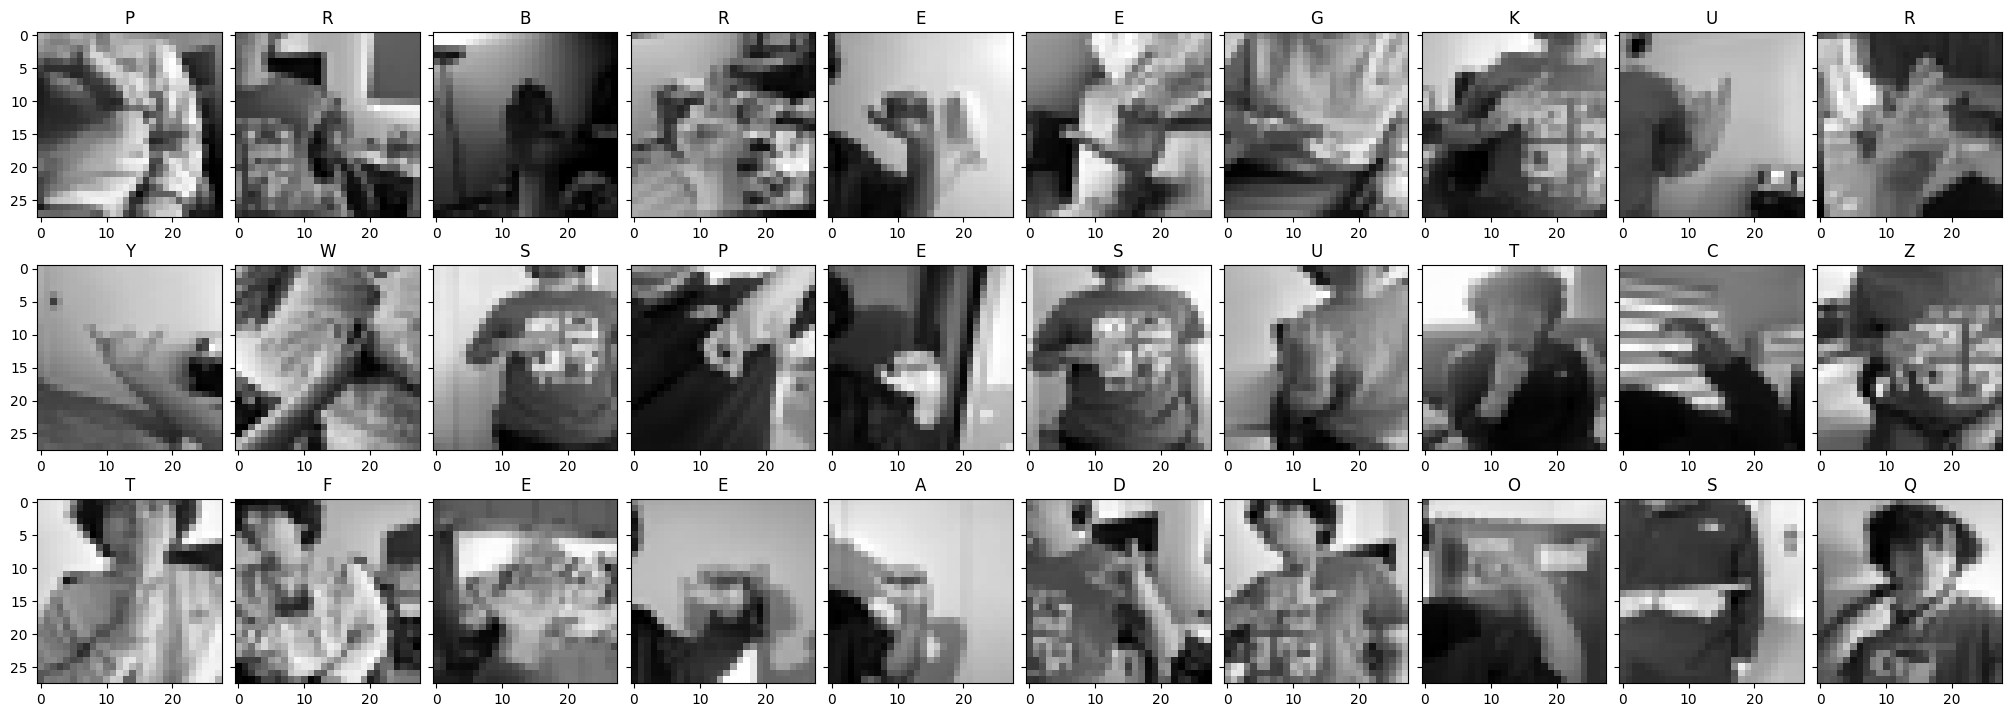

In [73]:
nrows_ = 3
ncols_ = 10
fig, axes = plt.subplots(nrows=nrows_, ncols=ncols_, figsize=(20, 7), sharey=True ,layout='constrained')
for ax, i in zip(axes.flat, range(nrows_*ncols_)):
  ax.imshow(valid_img[i],cmap='gray')
  ax.set_title(valid_labels[i])

# Pre procesamiento

In [74]:
#pasamos donde se encuentran los dataset de cada conjunto
data_entrenamiento='/content/drive/MyDrive/UGTO/DCI-data/lenguaje/train/data'
data_prueba='/content/drive/MyDrive/UGTO/DCI-data/lenguaje/test/data'

In [75]:
generador_entrenamiento = ImageDataGenerator(rescale=1./255,
                                             shear_range=0.3,
                                             zoom_range=0.3,
                                             horizontal_flip=True)
#Normalizacion de los datos
generador_prueba = ImageDataGenerator(rescale=1./255)

conjunto_entrenamiento = generador_entrenamiento.flow_from_directory(data_entrenamiento,
                                                                     target_size=(28, 28),
                                                                     batch_size=32,
                                                                     class_mode='categorical')

conjunto_prueba = generador_prueba.flow_from_directory(data_prueba,
                                                       target_size=(28, 28),
                                                       batch_size=32,
                                                       class_mode='categorical')

Found 2304 images belonging to 26 classes.
Found 114 images belonging to 26 classes.


In [78]:
#Clases a identificar
indices=conjunto_entrenamiento.class_indices
print(indices)

{'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5, 'G': 6, 'H': 7, 'I': 8, 'J': 9, 'K': 10, 'L': 11, 'M': 12, 'N': 13, 'O': 14, 'P': 15, 'Q': 16, 'R': 17, 'S': 18, 'T': 19, 'U': 20, 'V': 21, 'W': 22, 'X': 23, 'Y': 24, 'Z': 25}


#Primera aproximación

In [79]:
#
model = Sequential([
    Dense(units=2, input_shape=(28, 28, 3), activation='relu'),
    Flatten(),
    Dense(units=10, activation='relu'),
    Dense(units=26, activation='softmax')
])
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

historial= model.fit(conjunto_entrenamiento,epochs=10,validation_data=conjunto_prueba)

Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_32 (Dense)            (None, 28, 28, 2)         8         
                                                                 
 flatten_11 (Flatten)        (None, 1568)              0         
                                                                 
 dense_33 (Dense)            (None, 10)                15690     
                                                                 
 dense_34 (Dense)            (None, 26)                286       
                                                                 
Total params: 15984 (62.44 KB)
Trainable params: 15984 (62.44 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/10
72/72 [==============================] - 15s 189ms/step - loss: 3.2226 - accuracy: 0.0621 - val_loss: 3.2021 - val_accuracy: 0.0263
Epoch 

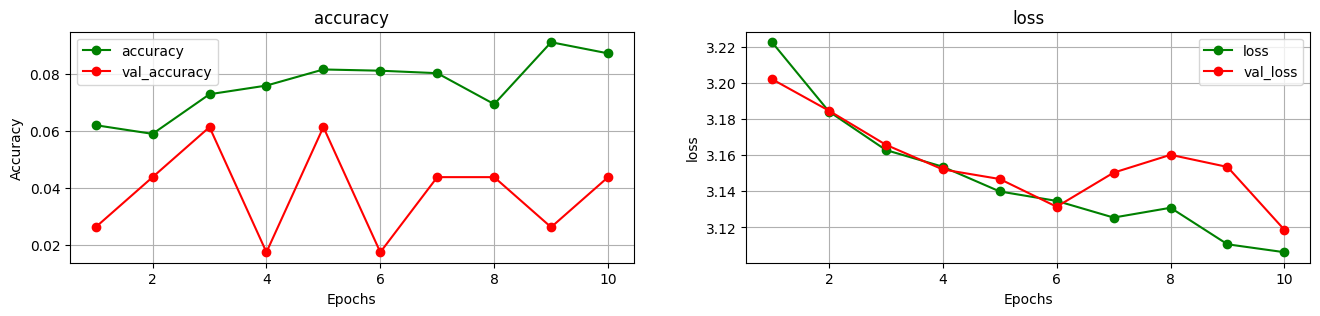

In [111]:
fig , ax = plt.subplots(1,2)
fig.set_size_inches(16,3)


ax[0].plot(epoch,historial.history['accuracy'],'go-',label='accuracy')
ax[0].plot(epoch,historial.history['val_accuracy'],'ro-',label='val_accuracy')
ax[0].set_title('accuracy')
ax[0].grid()
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Accuracy")
ax[0].legend()

ax[1].plot(epoch,historial.history['loss'],'go-',label='loss')
ax[1].plot(epoch,historial.history['val_loss'],'ro-',label='val_loss')
ax[1].set_title('loss')
ax[1].grid()
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('loss')
ax[1].legend()

## modificaciones


bias vs varianza

* **Bajo BIAS**: Sugiere menos supocisiones sobre la forma de la funcion objetivo
* **Alto BIAS**: Sugiere mas supocisiones sobre la forma de la funcion objetivo

se refiere a la alta calidad


# Primera aquitectura


In [91]:
historial.history[comp[1][0]]


[0.0620659738779068,
 0.0590277761220932,
 0.0729166641831398,
 0.0759548619389534,
 0.0815972238779068,
 0.0811631977558136,
 0.0802951380610466,
 0.0694444477558136,
 0.0911458358168602,
 0.0872395858168602]

In [82]:
comp[1][0]

'accuracy'

##primera aproximacion

In [ ]:
model = Sequential(
    [
        tf.keras.Input(shape=(x_train.shape[1],)),
        Dense(10, activation='relu', name = 'layer1'),
        Dense(27, activation='softmax', name = 'layer2')
     ]
)
model.compile(optimizer='adam', loss = 'SparseCategoricalCrossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer1 (Dense)              (None, 10)                163850    
                                                                 
 layer2 (Dense)              (None, 27)                297       
                                                                 
Total params: 164147 (641.20 KB)
Trainable params: 164147 (641.20 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
history = model.fit(x_train, y_train, epochs = 5)

Epoch 1/5


UnimplementedError: ignored

In [ ]:
model = Sequential()
model.add(Dense(3, activation='relu', input_shape=(x_train.shape[1],)))
model.add(Dense(27, activation='softmax'))

model.compile(optimizer='sgd', loss='SparseCategoricalCrossentropy', metrics=['accuracy'])

# Entrenamiento del modelo
history = model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test), verbose=1)

Epoch 1/5


ValueError: ignored

In [ ]:
lost, acc = model.evaluate(x_test, y_test)
print(lost, acc)